In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
plt.figure(figsize=(14,5))

 librosa.load - It typically returns a tuple containing two elements: the audio data itself, represented as a one-dimensional NumPy array, and the sampling rate of the audio data (in samples per second).


In [ ]:
data,sample_rate=librosa.load("./drive/MyDrive/audio/fold10/100648-1-1-0.wav")

In [ ]:
data.shape

(23153,)

In [ ]:
type(data)

numpy.ndarray

In [ ]:
data.min(),data.max()

(-0.15322974, 0.14558199)

In [ ]:
sample_rate

22050

In [ ]:
ipd.Audio(filename="./drive/MyDrive/audio/fold10/100648-1-1-0.wav")

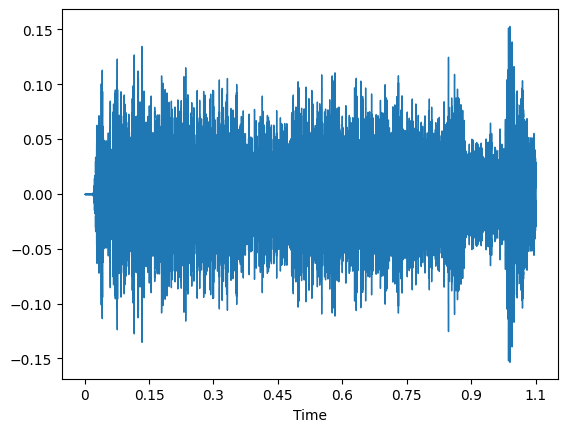

In [ ]:
librosa.display.waveshow(data,sr=sample_rate)

# Sample rate
is the number of samples per second that are taken of a waveform to create a discete digital signal

If we use librosa sample rate  always will be 22050

In [ ]:
data

array([-2.7939677e-09, -3.2596290e-09, -4.6566129e-10, ...,
       -2.4778431e-02, -1.5212605e-02, -3.8560163e-03], dtype=float32)

Data is also normalized -1 to 1  if we use librosa

In [ ]:
import pandas as pd

In [ ]:
metadata=pd.read_csv("./drive/MyDrive/metadata/UrbanSound8K.csv")

In [ ]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [ ]:
import seaborn as sns

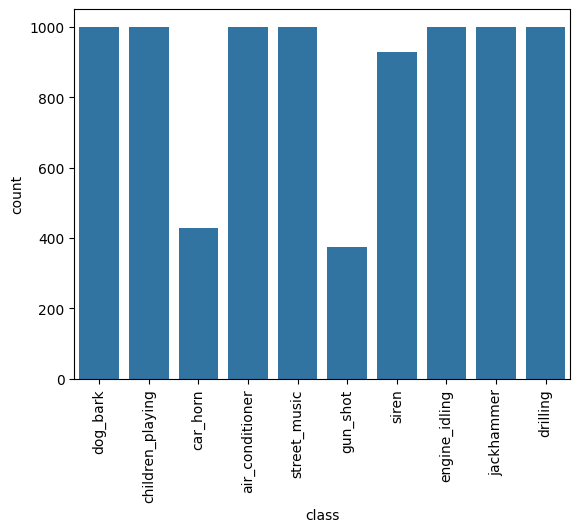

In [ ]:
sns.countplot(data=metadata,x="class")
plt.xticks(rotation=90);

In [ ]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


# EDA using Scipy

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read('./drive/MyDrive/audio/fold10/101382-2-0-10.wav')

In [ ]:
wave_sample_rate

48000

scypy give the default sample rate of the audio

In [ ]:
wave_audio

array([[-2118, -1239],
       [-2388, -1681],
       [-2137, -1672],
       ...,
       [ -697,  -404],
       [ -653,  -314],
       [ -427,  -154]], dtype=int16)

In [ ]:
wave_audio.shape

(192000, 2)

also the audio data will have two channels

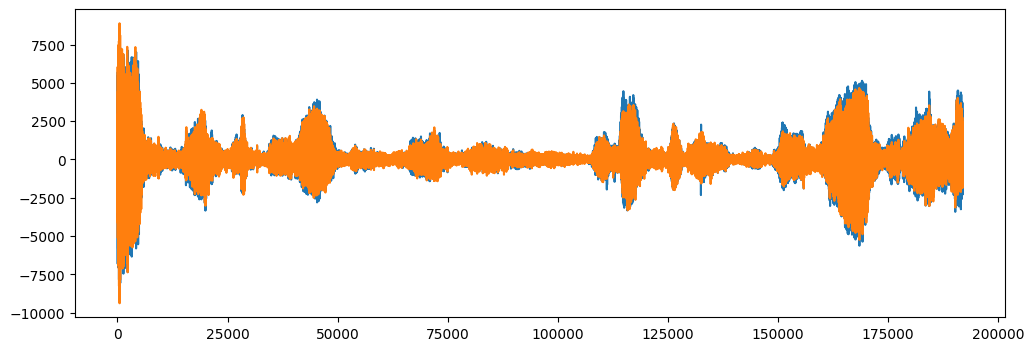

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)


In [ ]:
mfccs

array([[-378.57523  , -235.3352   , -196.75964  , ..., -161.18036  ,
        -179.25592  , -229.67802  ],
       [  98.302246 ,  104.11733  ,  106.76799  , ...,  106.51799  ,
         109.31788  ,  104.830826 ],
       [ -33.69744  ,  -27.447357 ,  -22.851711 , ...,  -18.910265 ,
         -12.274794 ,   -4.110062 ],
       ...,
       [  -6.46053  ,   -3.9935923,   -2.6537762, ...,   -3.343213 ,
           5.1180735,    1.7960309],
       [ -15.89254  ,  -15.130505 ,  -10.850929 , ...,  -15.976558 ,
         -13.39007  ,  -12.785211 ],
       [  12.119841 ,   12.837377 ,   12.33375  , ...,   -2.9317586,
          -4.876606 ,    0.5197767]], dtype=float32)

In [ ]:
mfccs.shape

(40, 46)

In [ ]:
import os

In [ ]:
audio_dataset_path="./drive/MyDrive/audio/"

In [ ]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
features=features_extractor('./drive/MyDrive/audio/fold2/100652-3-0-0.wav')

In [ ]:
features

array([-2.7262979e+02,  9.6864433e+01, -8.6221619e+01, -9.1683168e+00,
        4.1690631e+00, -1.6863976e+01, -1.3483454e+01, -1.5073338e-01,
       -6.5874720e+00,  1.2746602e+01,  1.1142549e+01,  1.0575512e+01,
        2.8224607e+00,  1.1033565e+00, -5.5791664e+00,  2.5960605e+00,
        3.2115486e+00,  2.1094527e+00, -1.9883199e+00,  8.9473162e+00,
        5.0020280e+00,  1.4041771e+00,  4.0573792e+00,  1.4149213e+00,
       -2.9597342e+00,  5.9678936e+00, -1.0870241e+00,  4.1223392e+00,
        8.7700289e-01,  2.3022511e+00,  3.1168418e+00,  2.8330684e+00,
       -2.6234725e+00,  2.1117997e+00,  4.2967722e-01,  3.1507876e+00,
        7.4390513e-01,  1.3192836e+00,  1.5101153e+00,  1.9387920e+00],
      dtype=float32)

In [ ]:
features.shape

(40,)

In [ ]:
import numpy as np

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [16:41,  3.39it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [45:35,  2.95it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [45:36,  3.19it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [48:08,  3.02it/s]


In [ ]:
extracted_features

[[array([-2.11936981e+02,  6.25812111e+01, -1.22813156e+02, -6.07452927e+01,
         -1.38937550e+01, -2.97898369e+01, -3.97887206e+00,  1.16827412e+01,
          1.29638338e+01,  8.33642101e+00, -6.52981615e+00, -2.99610305e+00,
         -1.28879452e+01,  5.88593531e+00, -2.47522211e+00, -4.40830898e+00,
         -1.50144739e+01, -9.43993568e-01, -2.57990885e+00,  6.09830046e+00,
         -1.07862244e+01, -8.06347752e+00,  5.84409761e+00, -3.12253714e+00,
         -5.98421907e+00, -7.99423605e-02, -3.68708301e+00,  4.74768400e+00,
         -6.53008986e+00, -5.08387661e+00,  4.87733394e-01,  7.51089001e+00,
         -8.85352135e-01,  2.39381909e+00, -6.39236689e+00, -2.13185382e+00,
          2.27601981e+00, -7.91079581e-01, -1.54006326e+00,  1.32115364e+00],
        dtype=float32),
  'dog_bark'],
 [array([-4.1700519e+02,  9.9336624e+01, -4.2995583e+01,  5.1073326e+01,
          9.8537769e+00,  7.9696932e+00,  1.1197088e+01,  1.9291173e+00,
          7.0303974e+00,  4.2702279e+00, -3.

In [ ]:
len(extracted_features)

8732

In [ ]:
extracted_features[4545]

[array([-4.6560449e+02,  1.5092371e+02,  2.1171368e+01,  3.4235081e+01,
         9.4290104e+00,  1.8925762e+01,  1.2502553e+01,  7.4841247e+00,
         3.9257643e+00,  7.6063437e+00, -3.3409705e+00,  5.6330638e+00,
         1.2660817e+00,  2.2357683e+00, -7.6934905e+00, -1.2160513e+00,
        -7.7029643e+00, -4.5308261e+00, -7.5156617e+00, -7.7325821e-02,
        -4.9312220e+00,  8.2744497e-01,  8.4971857e-01,  2.3412850e+00,
        -2.3944738e+00,  1.6384207e+00, -2.6667099e+00, -1.4920820e+00,
        -2.9868805e+00,  1.8320633e+00, -5.0635260e-01,  1.6477065e+00,
        -1.9277834e+00,  3.5420313e-01, -2.6115489e+00, -1.9503687e-01,
        -3.2021902e+00,  1.6817321e+00, -2.2258453e+00, -7.3701340e-01],
       dtype=float32),
 'air_conditioner']

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.58121, -122.813156, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995583, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.57807, 43.195866, ...",children_playing
3,"[-406.47922, 91.1966, -25.043552, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658783, 50.690285,...",children_playing


In [ ]:
  ### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y.shape

(8732,)

In [ ]:
y=np.array(pd.get_dummies(y,dtype=int))

In [ ]:
y.shape

(8732, 10)

In [ ]:
y[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
num_labels=y.shape[1]
num_labels

10

# ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [ ]:
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

In [ ]:
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
197/219 [=========================>....] - ETA: 0s - loss: 0.7927 - accuracy: 0.7381
Epoch 1: val_loss did not improve from 0.60309
219/219 [==============================] - 1s 3ms/step - loss: 0.7942 - accuracy: 0.7359 - val_loss: 0.6165 - val_accuracy: 0.8082
Epoch 2/100
202/219 [==========================>...] - ETA: 0s - loss: 0.7920 - accuracy: 0.7333
Epoch 2: val_loss did not improve from 0.60309
219/219 [==============================] - 1s 3ms/step - loss: 0.7914 - accuracy: 0.7334 - val_loss: 0.6077 - val_accuracy: 0.8094
Epoch 3/100
205/219 [===========================>..] - ETA: 0s - loss: 0.8096 - accuracy: 0.7223
Epoch 3: val_loss did not improve from 0.60309
219/219 [==============================] - 1s 3ms/step - loss: 0.8070 - accuracy: 0.7228 - val_loss: 0.6037 - val_accuracy: 0.8140
Epoch 4/100
219/219 [==============================] - ETA: 0s - loss: 0.7933 - accuracy: 0.7432
Epoch 4: val_loss did not improve from 0.60309
219/219 [======================

In [ ]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

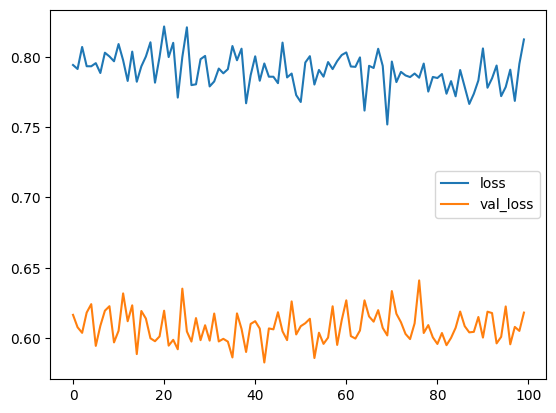

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

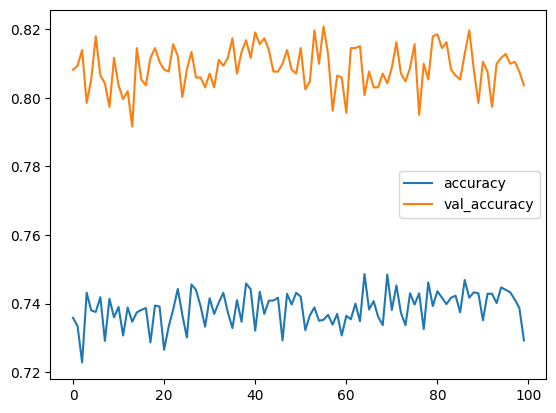

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.803663432598114


In [ ]:
test_a_single_sound="./drive/MyDrive/audio/fold7/183992-3-0-3.wav"

In [ ]:
ipd.Audio(filename="./drive/MyDrive/audio/fold7/183992-3-0-3.wav")

In [ ]:
test_features=features_extractor(test_a_single_sound)

In [ ]:
test_features.shape

(40,)

In [ ]:
model.predict(test_features.reshape(1,-1))

1/1 [==============================] - 0s 30ms/step


array([[3.9418964e-03, 3.0182365e-03, 8.9177825e-02, 6.7792332e-01,
        2.0657768e-02, 3.6064666e-03, 1.1430340e-01, 1.9267680e-04,
        1.6750591e-02, 7.0427842e-02]], dtype=float32)

In [ ]:
test_features.reshape(1,-1).shape

(1, 40)

In [ ]:
(model.predict(test_features.reshape(1,-1)) > 0.5).astype("int32")

1/1 [==============================] - 0s 19ms/step


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
metadata[(metadata["fold"]==7) & (metadata['slice_file_name']=="183992-3-0-3.wav")]

,slice_file_name,fsID,start,end,salience,fold,classID,class
4451,183992-3-0-3.wav,183992,1.5,5.5,1,7,3,dog_bark


In [ ]:
model.predict(X_test)

55/55 [==============================] - 0s 3ms/step


array([[3.8212797e-06, 1.2295527e-04, 2.6111067e-05, ..., 2.3526509e-06,
        1.9497253e-05, 4.6631010e-04],
       [1.3956495e-04, 7.8843292e-03, 6.2180572e-04, ..., 2.2494534e-03,
        1.1050924e-04, 1.5634825e-02],
       [2.6830199e-18, 8.0355708e-11, 3.0914890e-15, ..., 1.5142178e-06,
        3.0773200e-13, 2.5396766e-13],
       ...,
       [1.4921595e-11, 9.9416500e-01, 3.6941859e-08, ..., 5.0014921e-09,
        8.3610319e-09, 5.8013080e-03],
       [6.1938927e-02, 6.3181273e-03, 4.5519835e-01, ..., 6.5791616e-03,
        1.5371301e-02, 2.8106287e-01],
       [7.7229902e-02, 7.0255771e-03, 3.7684944e-01, ..., 4.5773061e-03,
        7.1603298e-02, 1.1746595e-01]], dtype=float32)

In [ ]:
y_pred=(model.predict(X_test) > 0.5).astype("int32")

55/55 [==============================] - 0s 4ms/step


In [ ]:
np.argmax(model.predict(X_test), axis=-1)

55/55 [==============================] - 0s 4ms/step


array([5, 4, 4, ..., 1, 2, 2])

In [ ]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       195
           1       1.00      0.66      0.79        91
           2       0.87      0.43      0.58       205
           3       0.90      0.62      0.73       182
           4       0.94      0.81      0.87       202
           5       0.99      0.79      0.88       216
           6       0.96      0.52      0.67        87
           7       0.94      0.91      0.93       187
           8       0.99      0.73      0.84       199
           9       0.74      0.54      0.62       183

   micro avg       0.92      0.70      0.79      1747
   macro avg       0.92      0.68      0.78      1747
weighted avg       0.92      0.70      0.79      1747
 samples avg       0.70      0.70      0.70      1747



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


55/55 [==============================] - 0s 2ms/step


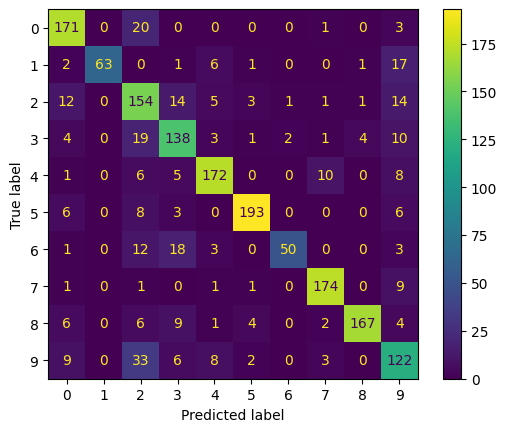

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.argmax(y_test, axis=-1),np.argmax(model.predict(X_test), axis=-1))).plot()

In [ ]:
filename="./drive/MyDrive/audio/fold7/183992-3-0-3.wav"
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)

[-4.4692792e+02  1.1724991e+02  3.9657936e+01  1.4798341e+01
  1.5616082e+01  9.8165302e+00 -3.2972322e+00 -5.0331483e+00
 -5.3774695e+00 -9.0269083e-01 -1.6530262e+00  2.4498224e-01
 -2.7770987e-01  1.1561199e+00  4.2395787e+00  1.6417781e+00
 -7.2751395e-02  2.4445018e-01 -6.6894400e-01 -2.1304929e+00
 -2.4916494e+00 -3.0711699e+00 -2.7647102e+00 -3.2392712e+00
 -3.2490814e+00 -2.0453644e+00 -8.3071214e-01  8.1398195e-01
  4.3422857e-01  6.5435791e-01  5.1764309e-01 -7.7009916e-02
 -2.6306486e-01 -4.5304772e-01 -6.5147460e-01 -6.9831437e-01
 -1.4584590e+00 -1.9673705e+00 -2.5822136e+00 -1.8308164e+00]
[[-4.4692792e+02  1.1724991e+02  3.9657936e+01  1.4798341e+01
   1.5616082e+01  9.8165302e+00 -3.2972322e+00 -5.0331483e+00
  -5.3774695e+00 -9.0269083e-01 -1.6530262e+00  2.4498224e-01
  -2.7770987e-01  1.1561199e+00  4.2395787e+00  1.6417781e+00
  -7.2751395e-02  2.4445018e-01 -6.6894400e-01 -2.1304929e+00
  -2.4916494e+00 -3.0711699e+00 -2.7647102e+00 -3.2392712e+00
  -3.2490814e+00 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn_model = Sequential()

# Convolutional layer 1
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(40, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))

# Convolutional layer 2
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Convolutional layer 3cnn_modell.add(Conv1D(256, 3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten layer
cnn_model.add(Flatten())

# Dense layercnn_modell.add(Dense(256, activation='relu'))cnn_modell.add(Dropout(0.5))

# Output layer
cnn_model.add(Dense(num_labels, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 4, 128)            0         
 g1D)                                                            
                                                      

In [ ]:
cnn_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), verbose=1,)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 5s 18ms/step - loss: 1.5833 - accuracy: 0.4936 - val_loss: 1.3019 - val_accuracy: 0.5695
Epoch 2/100
219/219 [==============================] - 3s 13ms/step - loss: 1.0747 - accuracy: 0.6384 - val_loss: 1.0292 - val_accuracy: 0.6554
Epoch 3/100
219/219 [==============================] - 2s 8ms/step - loss: 0.9057 - accuracy: 0.7002 - val_loss: 0.9144 - val_accuracy: 0.6949
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 0.7980 - accuracy: 0.7359 - val_loss: 0.8266 - val_accuracy: 0.7333
Epoch 5/100
219/219 [==============================] - 2s 8ms/step - loss: 0.7115 - accuracy: 0.7628 - val_loss: 0.8111 - val_accuracy: 0.7270
Epoch 6/100
219/219 [==============================] - 2s 8ms/step - loss: 0.6451 - accuracy: 0.7805 - val_loss: 0.7950 - val_accuracy: 0.7361
Epoch 7/100
219/219 [==============================] - 2s 7ms/step - loss: 0.6068 - accuracy: 0.7930 - val_loss: 0.7717 - val_accuracy: 0.75

In [ ]:
cnn_metrics=pd.DataFrame(cnn_model.history.history)

<Axes: >

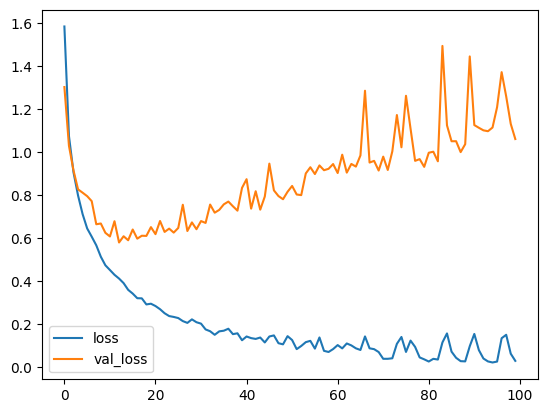

In [ ]:
cnn_metrics[["loss","val_loss"]].plot()

<Axes: >

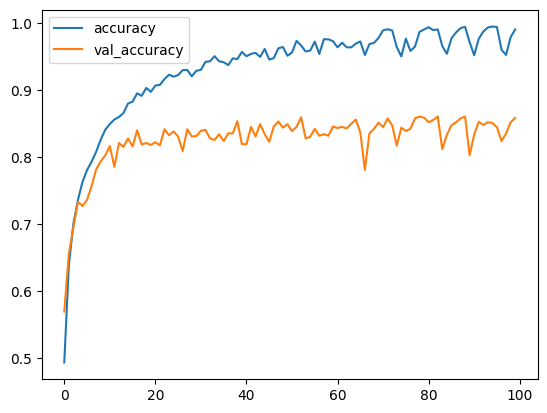

In [ ]:
cnn_metrics[["accuracy","val_accuracy"]].plot()

In [ ]:
cnn_metrics

,loss,accuracy,val_loss,val_accuracy
0,1.583319,0.493629,1.301943,0.569548
1,1.074661,0.638368,1.029222,0.655409
2,0.905685,0.700215,0.914359,0.694906
3,0.798015,0.735863,0.826600,0.733257
4,0.711522,0.762777,0.811125,0.726960
...,...,...,...,...
95,0.026581,0.993701,1.208384,0.844305
96,0.135039,0.959771,1.371078,0.823698
97,0.150993,0.952183,1.258295,0.835146
98,0.063138,0.978525,1.130867,0.851746


In [ ]:
cnn_model.evaluate(X_test,y_test)

55/55 [==============================] - 1s 4ms/step - loss: 7.9864 - accuracy: 0.0555


[7.986351013183594, 0.05552375316619873]

In [ ]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 7ms/step - loss: 0.6081 - accuracy: 0.8174


[0.6080970764160156, 0.8174012303352356]

In [ ]:
print(classification_report(y_test,(cnn_model.predict(X_test) > 0.5).astype("int32")))

55/55 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       195
           1       0.88      0.90      0.89        91
           2       0.77      0.78      0.77       205
           3       0.79      0.80      0.79       182
           4       0.84      0.85      0.84       202
           5       0.90      0.97      0.93       216
           6       0.92      0.87      0.89        87
           7       0.88      0.90      0.89       187
           8       0.94      0.91      0.93       199
           9       0.81      0.66      0.73       183

   micro avg       0.86      0.86      0.86      1747
   macro avg       0.86      0.86      0.86      1747
weighted avg       0.86      0.86      0.86      1747
 samples avg       0.86      0.86      0.86      1747



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


55/55 [==============================] - 1s 5ms/step


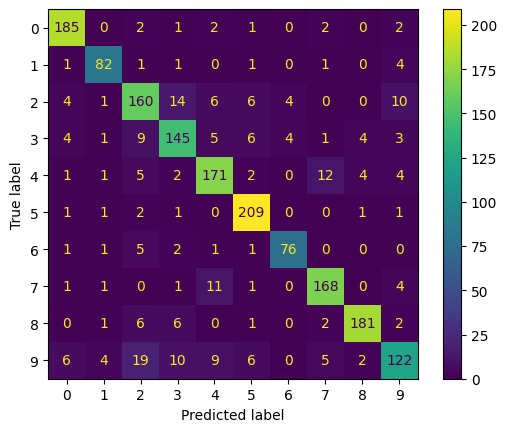

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.argmax(y_test, axis=-1),np.argmax(cnn_model.predict(X_test), axis=-1))).plot()

In [ ]:
cnn_model.save('./saved_models/audio_classification_model_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('./saved_models/audio_classification_model_with_keras_cnn.keras')

In [ ]:
cnn_model.save('./saved_models/audio_classification_model_ann_with_keras.keras')

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

rnn_model = Sequential()

# RNN layer
rnn_model.add(SimpleRNN(128, input_shape=(40, 1), return_sequences=True))
rnn_model.add(Dropout(0.5))

# Another RNN layer
rnn_model.add(SimpleRNN(128))
rnn_model.add(Dropout(0.5))

# Dense layer
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dropout(0.5))

# Output layer
rnn_model.add(Dense(num_labels, activation='softmax'))

rnn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 40, 128)           16640     
                                                                 
 dropout_9 (Dropout)         (None, 40, 128)           0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [ ]:
rnn_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), verbose=1,)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 12s 43ms/step - loss: 2.3801 - accuracy: 0.1472 - val_loss: 2.1241 - val_accuracy: 0.2667
Epoch 2/100
219/219 [==============================] - 8s 36ms/step - loss: 2.1684 - accuracy: 0.2003 - val_loss: 2.0163 - val_accuracy: 0.2662
Epoch 3/100
219/219 [==============================] - 8s 38ms/step - loss: 2.0373 - accuracy: 0.2503 - val_loss: 1.9249 - val_accuracy: 0.3211
Epoch 4/100
219/219 [==============================] - 9s 43ms/step - loss: 1.9742 - accuracy: 0.2783 - val_loss: 1.9073 - val_accuracy: 0.3183
Epoch 5/100
219/219 [==============================] - 7s 33ms/step - loss: 1.9264 - accuracy: 0.2941 - val_loss: 1.8348 - val_accuracy: 0.3635
Epoch 6/100
219/219 [==============================] - 9s 41ms/step - loss: 1.8660 - accuracy: 0.3218 - val_loss: 1.7650 - val_accuracy: 0.3807
Epoch 7/100
219/219 [==============================] - 7s 33ms/step - loss: 1.8304 - accuracy: 0.3403 - val_loss: 1.7116 - val_accuracy

In [ ]:
rnn_metrics=pd.DataFrame(rnn_model.history.history)

<Axes: >

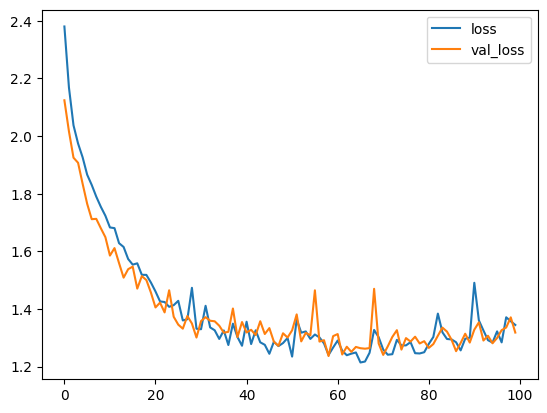

In [ ]:
rnn_metrics[["loss","val_loss"]].plot()

<Axes: >

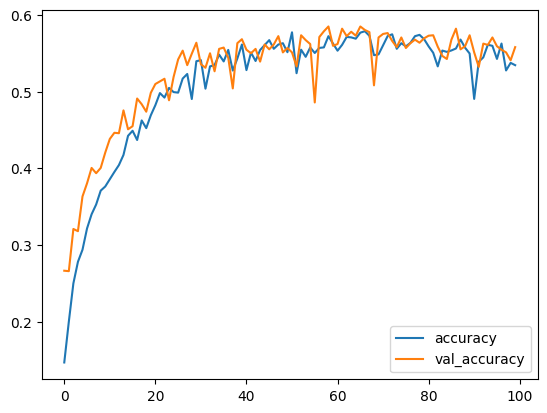

In [ ]:
rnn_metrics[["accuracy","val_accuracy"]].plot()

In [ ]:
metrics["val_accuracy"].max()

0.8208357095718384

In [ ]:
cnn_metrics["val_accuracy"].max()

0.8603320121765137

In [ ]:
rnn_metrics["val_accuracy"].max()

0.5850028395652771

In [ ]:
print(classification_report(y_test,(rnn_model.predict(X_test) > 0.5).astype("int32")))

55/55 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       195
           1       0.93      0.60      0.73        91
           2       1.00      0.01      0.02       205
           3       0.59      0.37      0.46       182
           4       0.88      0.07      0.13       202
           5       0.87      0.50      0.64       216
           6       0.75      0.62      0.68        87
           7       0.75      0.64      0.69       187
           8       0.82      0.42      0.56       199
           9       0.77      0.05      0.10       183

   micro avg       0.79      0.37      0.51      1747
   macro avg       0.82      0.40      0.48      1747
weighted avg       0.83      0.37      0.45      1747
 samples avg       0.37      0.37      0.37      1747



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


55/55 [==============================] - 1s 22ms/step


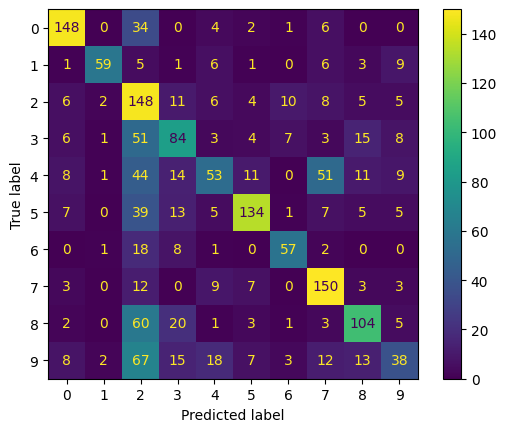

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.argmax(y_test, axis=-1),np.argmax(rnn_model.predict(X_test), axis=-1))).plot()

In [ ]:
accuracy={"Model":["ANN","CNN","RNN"],"accuracy":[0.8208357095718384,0.8603320121765137,0.5850028395652771]}

In [ ]:
acc_df=pd.DataFrame(accuracy)

<Axes: xlabel='Model'>

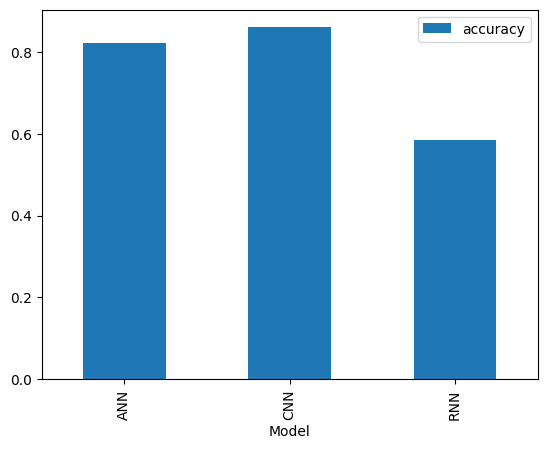

In [ ]:
acc_df.set_index("Model").plot(kind="bar")

In [ ]:
rnn_model.save('./saved_models/audio_classification_model_with_keras_rnn.keras')

In [ ]:
rnn_model.save('./saved_models/audio_classification_model_with_keras_rnn.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
cnn_model.save('./saved_models/audio_classification_model_with_keras_rnn.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
